<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/CentralitiesZachary2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, we continue or analysis and comparison of various centralities using the Zachary's network. We start by loading the network in a graph object.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()

# Get positions for the nodes in the graph
pos = nx.spring_layout(G)

Let's define, again, a function to draw the graph with nodes colored and sized according to their centrality values.

In [2]:
def draw_graph_with_centrality(G, node_values, title, pos):
    # Calculate the sum of the node_values
    total_sum = sum(node_values.values())

    # Normalize node values so that the sum of entries is equal to one
    node_values_normalized = {node: value / total_sum for node, value in node_values.items()}

    # Adjust the normalized values for color and size mapping
    # Multiplying by a constant for visualization purposes
    node_values_for_visualization = [v * 5000 for v in node_values_normalized.values()]

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=True, node_color=node_values_for_visualization,
            node_size=node_values_for_visualization, cmap=plt.cm.viridis)
    plt.title(title)
    plt.show()

Let's start by computing the eigenvector centralities...

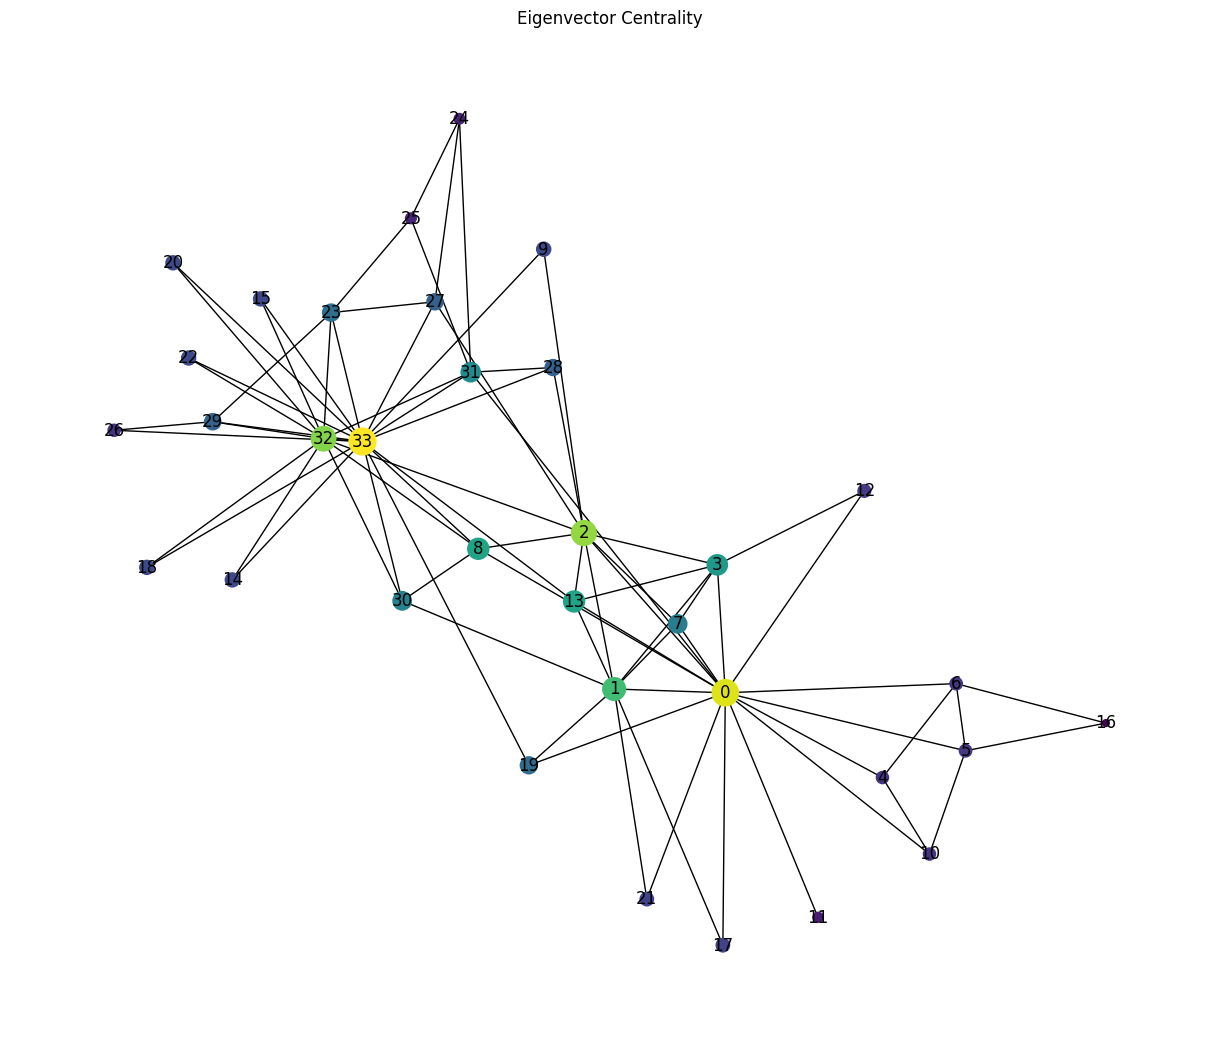

In [3]:
# Compute and plot eigenvector centralities
eigenvector_centrality = nx.eigenvector_centrality(G)
draw_graph_with_centrality(G, eigenvector_centrality, 'Eigenvector Centrality', pos)

Let's move on to computing and plotting the Katz centralities of all the nodes...

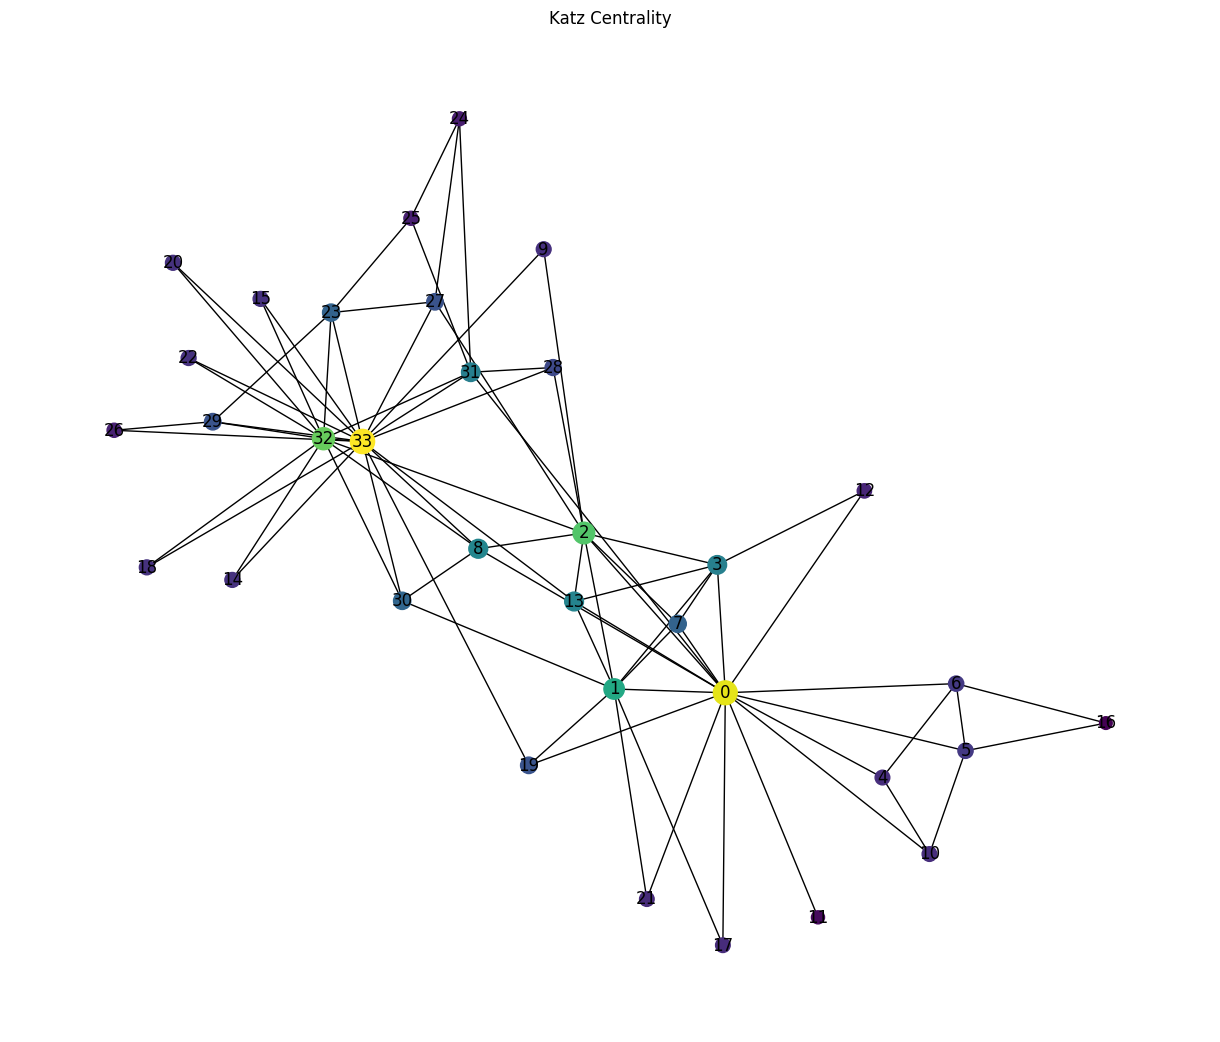

In [4]:
# Compute Katz centralities
# alpha is a hyperparameter (called 'attenuation' factor)
# You can optionally specify a 'beta' value, (default is 1.0 for all nodes).
alpha = 0.1
katz_centrality = nx.katz_centrality(G, alpha=alpha)
draw_graph_with_centrality(G, katz_centrality, 'Katz Centrality', pos)

Let's move on to the PageRank centralities...

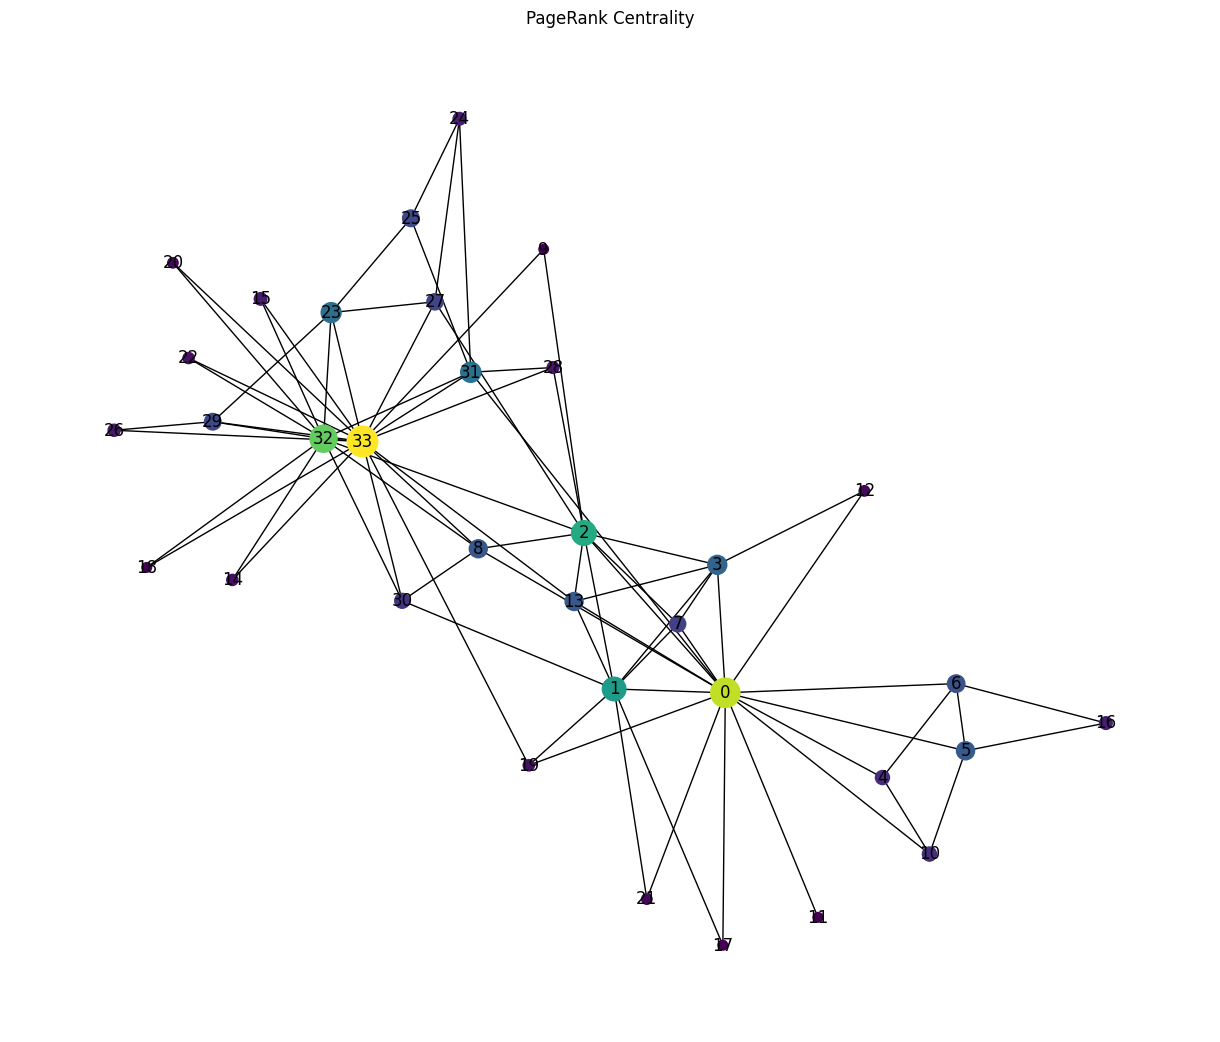

In [5]:
# Compute PageRank centralities
pagerank_centrality = nx.pagerank(G, alpha=0.85)  # alpha is the damping parameter
draw_graph_with_centrality(G, pagerank_centrality, 'PageRank Centrality', pos)

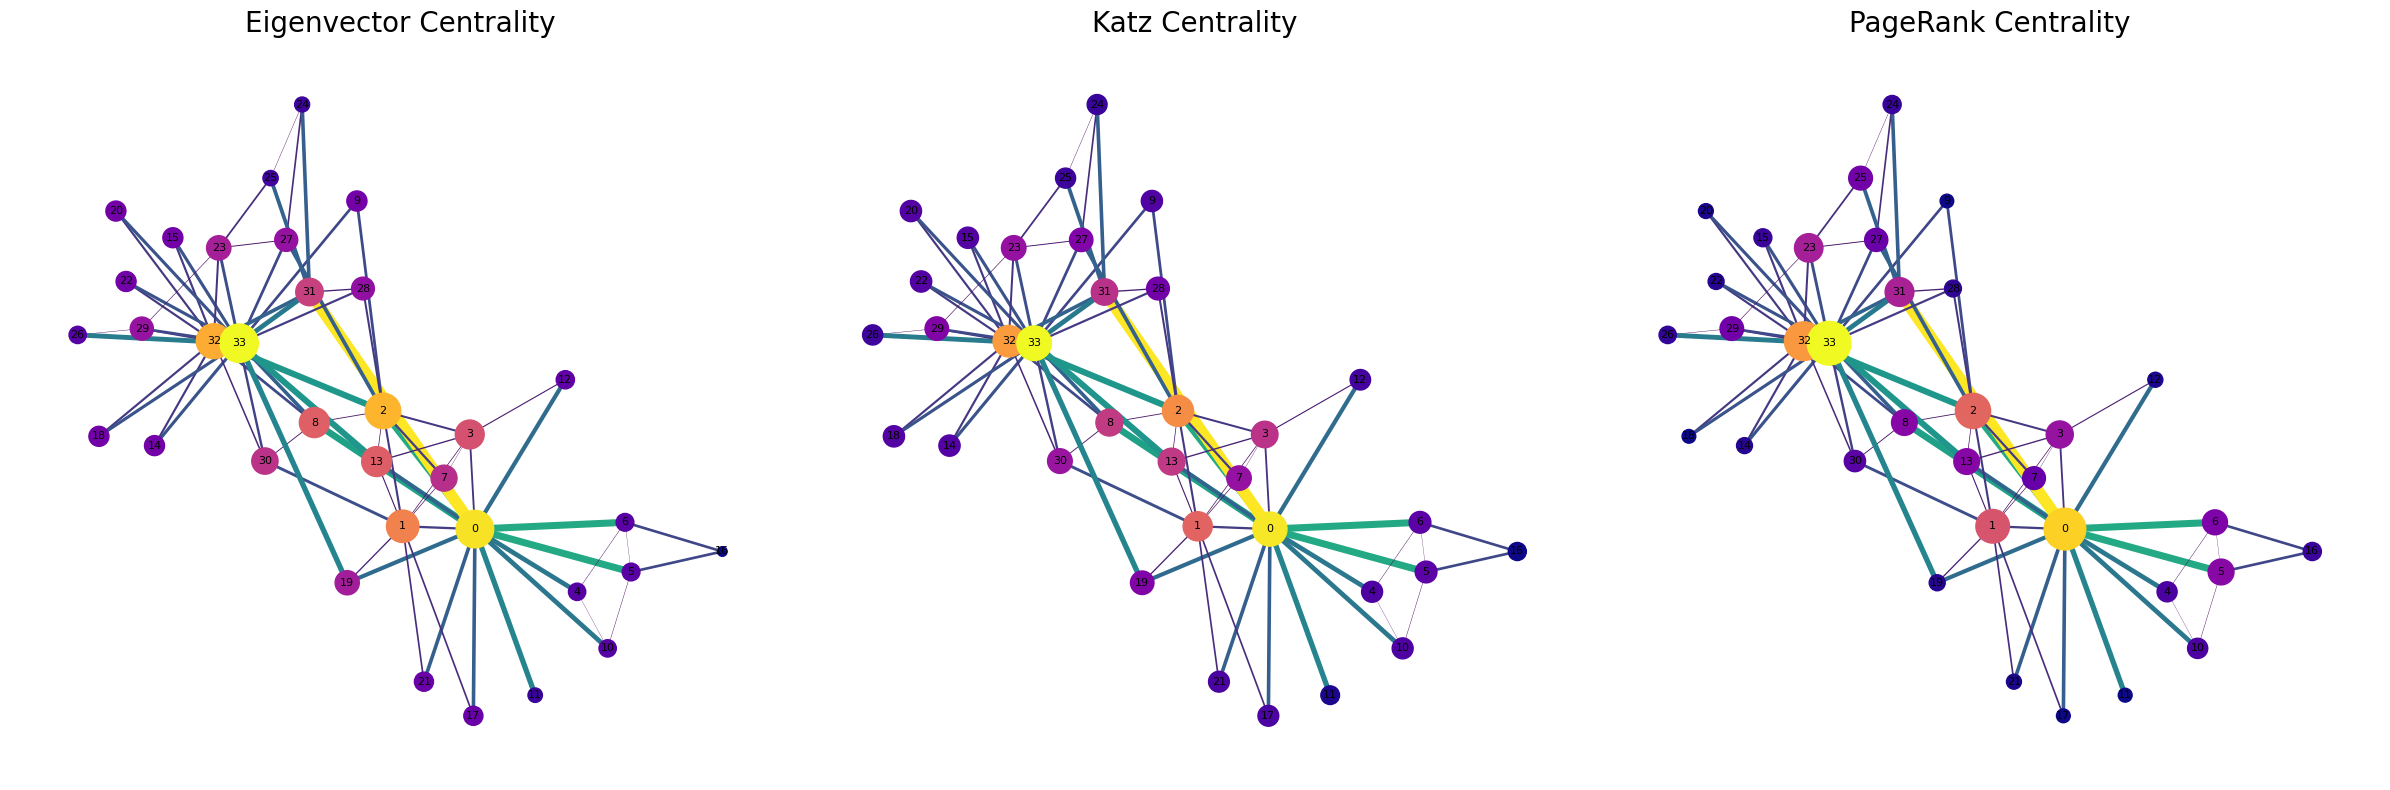

In [6]:
# Compute edge betweenness to color edges
edge_betweenness = nx.edge_betweenness_centrality(G)

# Compute average values for normalization
avg_eigenvector = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)
avg_katz = sum(katz_centrality.values()) / len(katz_centrality)
avg_pagerank = sum(pagerank_centrality.values()) / len(pagerank_centrality)
max_edge_betweenness = sum(edge_betweenness.values()) / len(edge_betweenness)

edges, edge_betw_values = zip(*edge_betweenness.items())
edge_colors = [edge_betweenness[e] / max_edge_betweenness for e in G.edges()]
edge_widths = [(edge_betweenness[e] * 2) / max_edge_betweenness for e in G.edges()]

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Helper function to draw the network
def draw_network(ax, G, pos, node_sizes, node_colors, title):
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edges, edge_color=edge_colors, width=edge_widths, edge_cmap=plt.cm.viridis)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=8)
    ax.set_title(title, fontsize=20)
    ax.axis('off')

# Eigenvector Centrality Plot
node_colors = [eigenvector_centrality[n] / avg_eigenvector for n in G.nodes()]
node_sizes = [(eigenvector_centrality[n] * 300) / avg_eigenvector for n in G.nodes()]
draw_network(axes[0], G, pos, node_sizes, node_colors, 'Eigenvector Centrality')

# Katz Centrality Plot
node_colors = [katz_centrality[n] / avg_katz for n in G.nodes()]
node_sizes = [(katz_centrality[n] * 300) / avg_katz for n in G.nodes()]
draw_network(axes[1], G, pos, node_sizes, node_colors, 'Katz Centrality')

# PageRank Centrality Plot
node_colors = [pagerank_centrality[n] / avg_pagerank for n in G.nodes()]
node_sizes = [(pagerank_centrality[n] * 300) / avg_pagerank for n in G.nodes()]
draw_network(axes[2], G, pos, node_sizes, node_colors, 'PageRank Centrality')

plt.tight_layout()
plt.show()